In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC


# <div class = "alert alert-block alert-success"> Reading the dataset </div>

In [2]:
dataset = pd.read_csv('./archive/Iris.csv')
print(dataset.head)

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

## <div class = "alert alert-block alert-info"> Separating the features, the classes and labeling the classes with 0, 1, and 2 </div>

In [3]:
dataset = dataset.replace({"Species":  {"Iris-setosa":0,"Iris-versicolor":1, "Iris-virginica":2}})
print(dataset.head)
X = dataset.iloc[:, 1:5].values
y = dataset.iloc[:, 5].values

print(X)
print(y)


<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2

[150 rows x 6 columns]>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 

# <div class = "alert alert-block alert-success"> Splitting the dataset into traing and testing dataset </div>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 0)


# <div class = "alert alert-block alert-info"> Standardize the train dataset and test dataset using sklearn's StandardScaler </div>

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# <div class = "alert alert-block alert-info"> Implementing Support Vector Machine(SVM) </div>

In [39]:
class SVM:
    def __init__(self, error = 1.0):
        self.error = error
        self.w  = 0
        self.b = 0
    
    def Hinge_loss(self, X, y, w, b):
        reg = 0.5 * np.dot(w, w.T)

        loss = 0
        for i in range(X.shape[0]):
            opt_term = y[i] * (np.dot(w, X[i]) + b)
            loss += reg + self.error * max(0, 1 - opt_term)

        return loss / X.shape[0]
    def fit(self, X, y, batch_size=100, learning_rate=0.001, epochs=10000):
        self.classes_ = np.unique(y)
        self.models_ = {}
        self.losses_ = {}

        for c in self.classes_:
            binary_y = np.where(y == c, 1, -1)
            w, b, losses = self._fit_binary(X, binary_y, batch_size, learning_rate, epochs)
            self.models_[c] = (w, b)
            self.losses_[c] = losses
        
        

    def _fit_binary(self, X, y, batch_size = 100, learning_rate = 0.001, epochs = 10000):
        number_of_features = X.shape[1]
        number_of_samples = X.shape[0]
        error  = self.error

        ids = np.arange(number_of_samples)
        np.random.seed(0)
        np.random.shuffle(ids)

        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        for i in range(epochs):
            l = self.Hinge_loss(X, y, w, b)
            losses.append(l)
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0 
                for j in range(batch_initial, batch_initial + batch_size):
                    if j < number_of_samples:
                        a = ids[j]
                        ti = y[a] * (np.dot(w, X[a].T) + b)
                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += error * y[a] * X[a]
                            gradb += error * y[a]
        
            w = w - learning_rate * w + learning_rate * gradw
            b = b + learning_rate * gradb

        self.w = w
        self.b = b

        return self.w, self.b, losses
    

    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            scores = {}
            for c in self.classes_:
                w, b = self.models_[c]
                score = np.dot(w, X[i]) + b
                scores[c] = score
            predicted_class = max(scores, key=scores.get)
            predictions.append(predicted_class)
        return np.array(predictions)





## <div class = "alert alert-block alert-success"> Training SVM on the Iris dataset </div>

In [50]:
svm  = SVM()
svm.fit(X_train, y_train)

## <div class = "alert alert-block alert-success"> Make prediction and calculating the Accuracy </div>

In [51]:
prediction = svm.predict(X_test)
prediction = prediction.reshape(-1)

print("true label", y_test)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))


true label [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Prediction: [2 1 0 1 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Accuracy: 0.9333333333333333


<div class="alert alert-block alert-info"> As we see, the implemented SVM algorithm has accuracy of 93.33% </div>

### <div class = "alert alert-block alert-success"> Below we use different metrics to show the performance of our SVM implementation </div>

<div class = "alert alert-block alert-info"> Confusion Matrix </div>

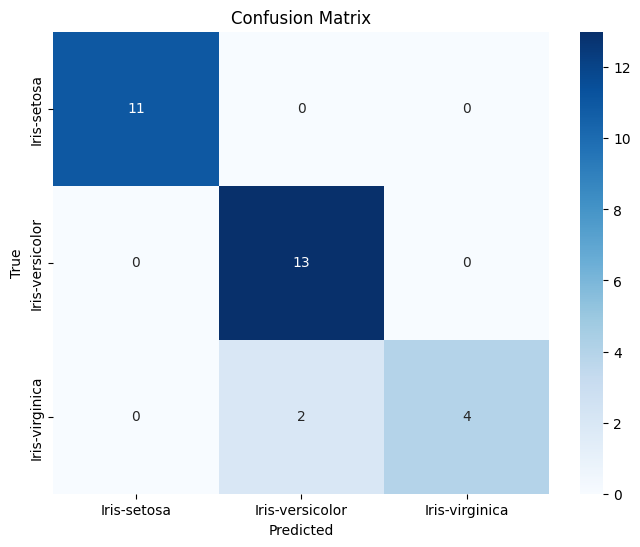

In [53]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


plot_confusion_matrix(y_test, prediction, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])


<div class = "alert alert-block alert-info"> Precision </div> 

In [54]:
precision = precision_score(y_test, prediction, average="weighted")
print("Precision:", precision)

Precision: 0.9422222222222222


<div class = "alert alert-block alert-info"> Recall </div> 

In [55]:
recall = recall_score(y_test, prediction, average = "weighted")
print("Recall:", recall)

Recall: 0.9333333333333333


<div class = "alert alert-block alert-info"> F1 Score </div> 

In [56]:
f1 = f1_score(y_test, prediction, average = "weighted")
print("F1 Score:", f1)


F1 Score: 0.929047619047619


<div class = "alert alert-block alert-info"> class report </div> 

In [57]:
class_report = classification_report(y_test, prediction)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.87      1.00      0.93        13
           2       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.96      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30



## <div class = "alert alert-block alert-info"> Using the sklearn's svm on the Iris dataset </div>

In [43]:
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [44]:
precision = precision_score(y_test, y_pred, average="weighted")
print("Precision:", precision)

Precision: 1.0


In [45]:
recall = recall_score(y_test, y_pred, average = "weighted")
print("Recall:", recall)

Recall: 1.0


In [46]:
f1 = f1_score(y_test, y_pred, average = "weighted")
print("F1 Score:", f1)


F1 Score: 1.0


In [48]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

